In [1]:
# importing necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Get Features data from compressed file

In [2]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('data_x.npz')
# extract the first array
X = dict_data['arr_0']
# print the array
print(X)


[[ 7.61570786e-02  6.56093121e-01  6.97486043e-01 ... -5.49116870e-02
   8.43622550e-03  8.68360564e-03]
 [ 3.19148516e-01  7.88175575e-01  7.97310264e-01 ... -4.54879980e-02
   6.22307115e-03  3.68944098e-03]
 [ 7.96194366e-02  7.41017640e-01  6.35196090e-01 ... -6.75728546e-02
   1.07973404e-02 -1.56228028e-02]
 ...
 [ 4.21099154e-02  6.06974602e-01  6.26703024e-01 ... -8.72499610e-03
  -2.71237992e-04  8.32928067e-03]
 [ 4.41170794e-02  6.30543611e-01  6.68172135e-01 ... -1.16808890e-02
  -2.20377119e-03  8.63203886e-03]
 [ 4.50589025e-02  5.49822748e-01  5.96909761e-01 ...  1.06826018e-02
   6.74372531e-03 -6.59982994e-03]]


In [3]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('data_y.npz')
# extract the first array
Y = dict_data['arr_0']
# print the array
print(Y)


['angry' 'angry' 'angry' ... 'surprise' 'surprise' 'surprise']


In [4]:
X.shape, Y.shape

((36621, 187), (36621,))

In [5]:
Features = pd.DataFrame(X)
Features['labels'] = Y

Features.shapeFeatures = pd.DataFrame(X)
Features['labels'] = Y

Features.shape

(36621, 188)

In [6]:
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,labels
0,0.076157,0.656093,0.697486,0.684813,0.680425,0.670918,0.575612,0.571766,0.629165,0.661047,...,19.071780,18.205848,64.143048,0.011220,0.014544,-0.039381,-0.054912,0.008436,0.008684,angry
1,0.319149,0.788176,0.797310,0.812976,0.829499,0.847087,0.707635,0.653075,0.712158,0.703063,...,15.328932,14.800526,13.616032,0.007847,0.007250,-0.010280,-0.045488,0.006223,0.003689,angry
2,0.079619,0.741018,0.635196,0.690803,0.682903,0.649258,0.640377,0.538545,0.533444,0.604091,...,18.945783,18.753808,65.110960,-0.040476,-0.005076,0.060663,-0.067573,0.010797,-0.015623,angry
3,0.068002,0.714656,0.741048,0.658524,0.676285,0.686411,0.614934,0.584842,0.618500,0.691588,...,18.087724,17.060770,63.748496,-0.008231,-0.019454,-0.039172,-0.033343,0.011401,0.004871,disgust
4,0.158222,0.796261,0.801238,0.758541,0.789688,0.792804,0.685369,0.635259,0.666385,0.723402,...,15.605381,15.044415,14.347040,-0.000711,-0.010401,-0.049108,-0.020721,0.007966,0.010416,disgust


In [7]:
track_features = [
    ['ZCR', 1],
    ['Chroma_stft', 12],
    ['poly_features', 10],
    ['MFCC', 20],
    ['RMS', 1],
    ['MelSpectogram', 128],
    ['spectral centroid', 1],
    ['spectral rolloff', 1],
    ['spectral contrast', 7],
    ['tonnetz', 6]
]

column_tracker, temp = [0], 0
for data in track_features:
    temp += data[1]
    column_tracker.append(temp)

print("Total number of columns:", column_tracker[-1])

tracker = pd.DataFrame(track_features, columns=[
                       'Features', 'Number of Columns Occupied'])
tracker['Starts From'] = column_tracker[:-1]

tracker


Total number of columns: 187


,Features,Number of Columns Occupied,Starts From
0,ZCR,1,0
1,Chroma_stft,12,1
2,poly_features,10,13
3,MFCC,20,23
4,RMS,1,43
5,MelSpectogram,128,44
6,spectral centroid,1,172
7,spectral rolloff,1,173
8,spectral contrast,7,174
9,tonnetz,6,181


`Note: The cell below must be run only once on the original Feature Instance`

In [8]:
features_to_choose = [1,2,3,5,9] # enter here

present_features = [i for i in range(10)]

to_remove = sorted([i for i in present_features if i not in features_to_choose], reverse=True)

for num in to_remove:
    Features = Features.drop(
        Features.iloc[:, column_tracker[num]:column_tracker[num + 1]], axis=1)


Features.shape

(36621, 177)

In [9]:
Features.head()

,1,2,3,4,5,6,7,8,9,10,...,169,170,171,181,182,183,184,185,186,labels
0,0.656093,0.697486,0.684813,0.680425,0.670918,0.575612,0.571766,0.629165,0.661047,0.759629,...,6.605648e-14,6.174020e-14,6.174255e-14,0.011220,0.014544,-0.039381,-0.054912,0.008436,0.008684,angry
1,0.788176,0.797310,0.812976,0.829499,0.847087,0.707635,0.653075,0.712158,0.703063,0.757499,...,1.015039e-02,1.032711e-02,1.052676e-02,0.007847,0.007250,-0.010280,-0.045488,0.006223,0.003689,angry
2,0.741018,0.635196,0.690803,0.682903,0.649258,0.640377,0.538545,0.533444,0.604091,0.654264,...,2.308509e-11,2.209153e-11,2.031034e-11,-0.040476,-0.005076,0.060663,-0.067573,0.010797,-0.015623,angry
3,0.714656,0.741048,0.658524,0.676285,0.686411,0.614934,0.584842,0.618500,0.691588,0.809584,...,7.580490e-11,7.497029e-11,7.442415e-11,-0.008231,-0.019454,-0.039172,-0.033343,0.011401,0.004871,disgust
4,0.796261,0.801238,0.758541,0.789688,0.792804,0.685369,0.635259,0.666385,0.723402,0.815546,...,3.322335e-04,3.249554e-04,3.275093e-04,-0.000711,-0.010401,-0.049108,-0.020721,0.007966,0.010416,disgust


## Model Training and Testing

In [10]:
X = Features.iloc[:, :-1].values
Y = Features['labels'].values

In [11]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

print(Y.shape)
Y[:5]

(36621, 8)


array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]])

In [12]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, random_state=125, test_size=0.25, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27465, 176), (27465, 8), (9156, 176), (9156, 8))

In [13]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27465, 176), (27465, 8), (9156, 176), (9156, 8))

In [14]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((27465, 176, 1), (27465, 8), (9156, 176, 1), (9156, 8))

In [15]:
model = Sequential()

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same',
          activation='relu', input_shape=(x_train.shape[1], 1)))

model.add(Conv1D(64, kernel_size=5, strides=1,
          padding='same', activation='relu'))

model.add(Conv1D(128, kernel_size=5, strides=1,
          padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 176, 128)          768       
                                                                 
 conv1d_1 (Conv1D)           (None, 176, 64)           41024     
                                                                 
 conv1d_2 (Conv1D)           (None, 176, 128)          41088     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 88, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 11264)             0         
                                                                 
 dense (Dense)               (None, 32)                360480    
                                                        

In [16]:
epochs = 100

In [17]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.75,
                         verbose=0, patience=2, min_lr=0.000001)
history = model.fit(x_train, y_train, batch_size=25, epochs=epochs,
                    validation_data=(x_test, y_test), callbacks=[rlrp])


Epoch 1/100
1099/1099 [==============================] - 49s 43ms/step - loss: 1.4850 - accuracy: 0.4101 - val_loss: 1.2550 - val_accuracy: 0.5038 - lr: 0.0010
Epoch 2/100
1099/1099 [==============================] - 54s 50ms/step - loss: 1.3049 - accuracy: 0.4710 - val_loss: 1.2059 - val_accuracy: 0.5166 - lr: 0.0010
Epoch 3/100
1099/1099 [==============================] - 52s 47ms/step - loss: 1.2488 - accuracy: 0.4952 - val_loss: 1.1613 - val_accuracy: 0.5362 - lr: 0.0010
Epoch 4/100
1099/1099 [==============================] - 61s 56ms/step - loss: 1.2028 - accuracy: 0.5152 - val_loss: 1.1407 - val_accuracy: 0.5506 - lr: 0.0010
Epoch 5/100
1099/1099 [==============================] - 51s 46ms/step - loss: 1.1637 - accuracy: 0.5291 - val_loss: 1.1090 - val_accuracy: 0.5558 - lr: 0.0010
Epoch 6/100
1099/1099 [==============================] - 51s 47ms/step - loss: 1.1333 - accuracy: 0.5425 - val_loss: 1.1142 - val_accuracy: 0.5557 - lr: 0.0010
Epoch 7/100
1099/1099 [=================

In [18]:
model_filename = "lstm.pkl"
joblib.dump(history, model_filename)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv1d
......vars
.........0
.........1
...layers\conv1d_1
......vars
.........0
.........1
...layers\conv1d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling1d
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-04 14:48:15         3535
metadata.jso

['lstm.pkl']

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-04 14:48:14         3535
metadata.json                                  2023-02-04 14:48:14           64
variables.h5                                   2023-02-04 14:48:14      5359128
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv1d
......vars
.........0
.........1
...layers\conv1d_1
......vars
.........0
.........1
...layers\conv1d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling1d
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.......

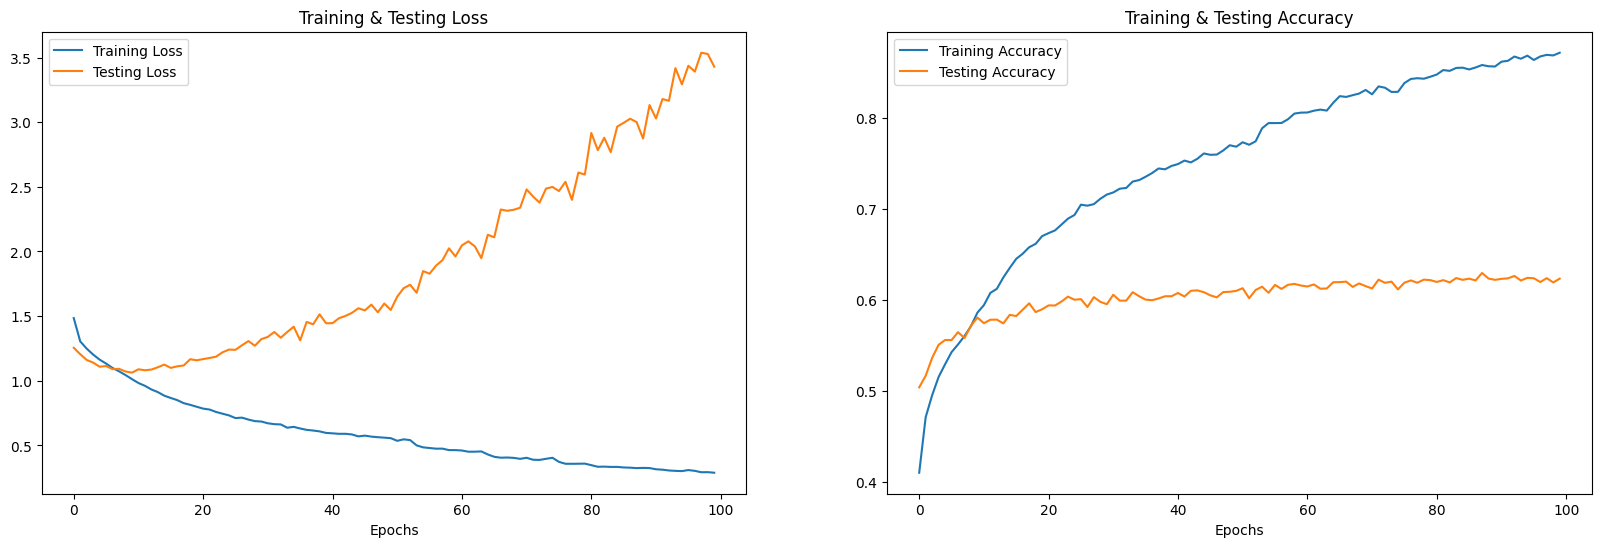

In [19]:
model_filename = "lstm.pkl"
history = joblib.load(model_filename)
model = history.model

print("Accuracy of our model on test data : ",
      model.evaluate(x_test, y_test)[1]*100, "%")

epochs = [i for i in range(epochs)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20, 6)
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
plt.grid(axis='y')

ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.grid(axis='y')
plt.show()


In [20]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)


287/287 [==============================] - 5s 15ms/step


In [21]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)


,Predicted Labels,Actual Labels
0,fear,fear
1,neutral,neutral
2,sad,surprise
3,disgust,disgust
4,neutral,neutral
5,disgust,happy
6,sad,neutral
7,disgust,fear
8,disgust,disgust
9,fear,fear


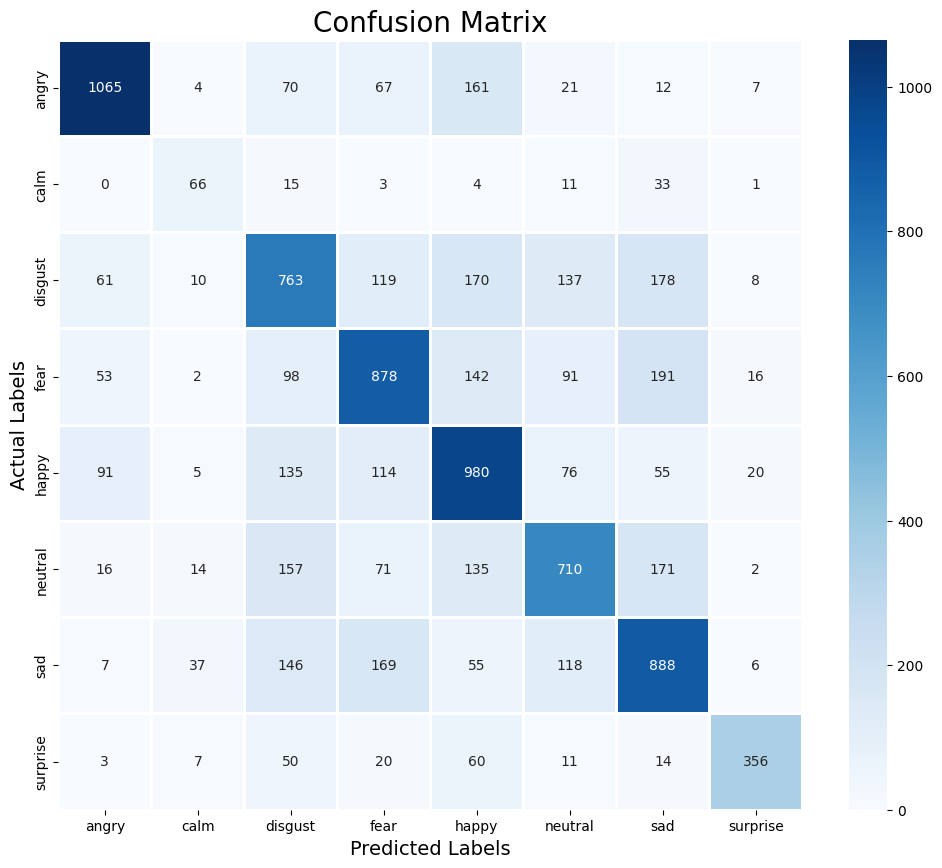

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[
                  i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues',
            linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()


In [23]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       angry       0.82      0.76      0.79      1407
        calm       0.46      0.50      0.47       133
     disgust       0.53      0.53      0.53      1446
        fear       0.61      0.60      0.60      1471
       happy       0.57      0.66      0.62      1476
     neutral       0.60      0.56      0.58      1276
         sad       0.58      0.62      0.60      1426
    surprise       0.86      0.68      0.76       521

    accuracy                           0.62      9156
   macro avg       0.63      0.61      0.62      9156
weighted avg       0.63      0.62      0.62      9156

